In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import math
import os
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN

In [4]:

def launch(dir_for_tmp_files, dataset, id, num_to_test = 10, steps = 100, verbose = False, eval = False,\
          eta = 1, lambdaX = 1, lambdaW = 1, lambdaF = 1, standardize = True, lat_dim = 2,\
           lags = [1, 5, 10, 20, 25, 100]):
    
    name = dir_for_tmp_files + '/' + 'current_launch' + str(id) + '.csv'
    dataset.to_csv(name, sep = ';', index = False)
    
    if 'timestamps' in dataset.columns:
        timestamps = dataset['timestamps'].as_matrix()
    else:
        timestamps = dataset['timestamp'].as_matrix()
    
    #train_start = math.ceil(timestamps[1])
    #train_end = math.floor(timestamps[timestamps.shape[0] -num_to_test - 1])
    #test_start = math.ceil(timestamps[timestamps.shape[0] -num_to_test])
    #test_end = math.floor(timestamps[-2])
    
    #train_start = 1513357140
    train_start = math.ceil(timestamps[0])
    #train_end = 1517653140
    train_end =  math.floor(timestamps[-num_to_test])
    #test_start = 1517653260
    test_start = math.ceil(timestamps[-num_to_test])
    test_end = math.floor(timestamps[-1])
    command = "./main --dataset_path " + name + " --separator ';'"
    command += ' --train_start ' + str(train_start)
    command += ' --train_end ' + str(train_end)
    command += ' --test_start ' + str(test_start)
    command += ' --test_end ' + str(test_end)
    command += ' --steps ' + str(steps)
    
    if verbose:
        command += ' --verbose 1'
    else:
        command += ' --verbose 0'
    
    if eval:
        command += ' --eval 1'
    else:
        command += ' --eval 0'
    
    command += ' --predictions_out ' + dir_for_tmp_files + '/predictions_' + str(id) + '.csv'
    command += ' --eta ' + str(eta)
    command += ' --lambdaX ' + str(lambdaX)
    command += ' --lambdaW ' + str(lambdaW)
    command += ' --lambdaF ' + str(lambdaF)
    
    if standardize:
        command += ' --standardize 1'
    else:
        command += ' --standardize 0'
    
    command += ' --lags '
    for lag in lags:
        command += str(lag) + ' '
    
    command += ' --lat_dim ' + str(lat_dim)
    command += ' --factor_out ' + dir_for_tmp_files + '/factor_out_' + str(id)
    logs_file_name = 'logs_file_' + str(id)
    command += ' --logs_file ' + dir_for_tmp_files + '/' + logs_file_name
    
    os.system(command)
    
    with open(dir_for_tmp_files + '/' + logs_file_name, 'r') as f:
        logs = [line for line in f]   
    F = pd.read_csv(dir_for_tmp_files + '/factor_out_' + str(id) + '_F.csv')   
    return F, logs

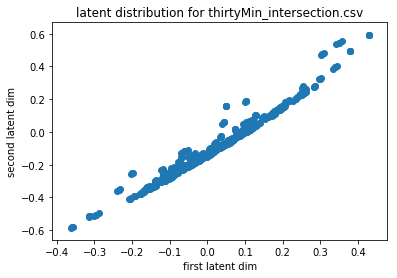

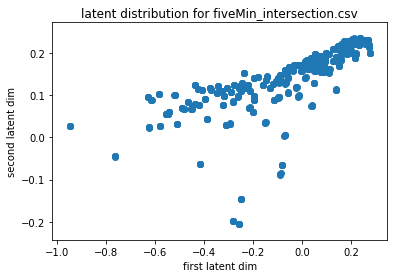

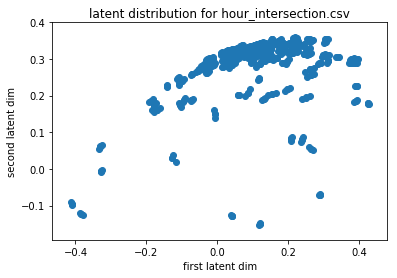

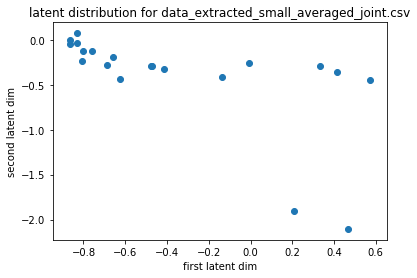

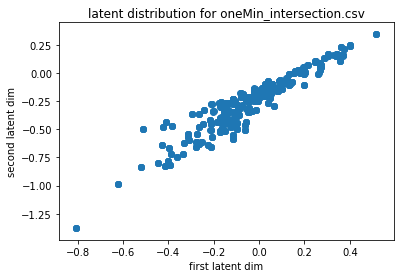

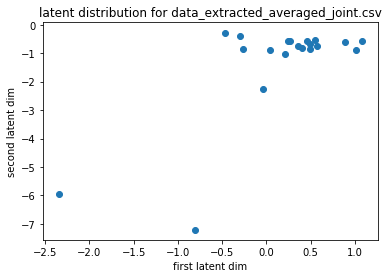

In [3]:
import warnings
warnings.filterwarnings("ignore")
datasets_names = os.listdir('datasets')
F_matrices = {}
for i in range(len(datasets_names)):
    dataset_name = datasets_names[i]
    if True:
        dataset = pd.read_csv('datasets/' + dataset_name, sep = ';')
        F, logs = launch('tmp', dataset, i, num_to_test = 20,  steps = 50, \
                               verbose = True,  eval = True, eta = 0.01, lambdaX = 1.0, \
                  lambdaW = 10, lambdaF = 10, standardize = 1, lat_dim = 2, lags = [1, 2, 3, 5, 10])
        F_matrices[dataset_name] = F
        F.to_csv('F_matrices/F_' + dataset_name)
        plt.scatter(F.iloc[0], F.iloc[1])
        plt.xlabel('first latent dim')
        plt.ylabel('second latent dim')
        plt.title('latent distribution for ' + dataset_name)
        plt.show()